In [ ]:
# Performed as a part of curriculum at Great Learning
# Using fer2013 dataset from Kaggle
# Worked on google colab

In [46]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D,ZeroPadding2D
import cv2
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import img_to_array

In [7]:
x_train,train_y,x_test,test_y=[],[],[],[]

In [19]:
df=pd.read_csv('/content/fer2013.csv')

In [20]:
for index,row in df.iterrows():
  val=row['pixels'].split(" ")
  try:
    if 'Training' in row['Usage']:
      x_train.append(np.array(val,'float32'))
      train_y.append(row['emotion'])
    elif 'PublicTest' in row['Usage']:
      x_test.append(np.array(val,'float32'))
  except:
    print(f"Error ocurred at index:{index} and row:{row}")

Error ocurred at index:622 and row:emotion                                                    2
pixels     58 143 188 205 129 99 116 103 100 177 202 223 ...
Usage                                                    NaN
Name: 622, dtype: object


In [21]:
num_features=64
num_labels=7
batch_size=64
epochs=50
width,height=48,48


In [22]:
x_train=np.array(x_train,'float32')
x_test=np.array(x_test,'float32')
train_y=np.array(train_y,'float32')
test_y=np.array(test_y,'float32')

In [23]:
from keras.utils.np_utils import to_categorical
train_y=to_categorical(train_y,num_classes=num_labels)
test_y=to_categorical(test_y,num_classes=num_labels)

In [24]:
x_train-=np.mean(x_train,axis=0)
x_train/=np.std(x_train,axis=0)
x_test-=np.mean(x_test,axis=0)
x_test/=np.std(x_test,axis=0)
x_train=x_train.reshape(x_train.shape[0],48,48,1)
x_test=x_test.reshape(x_test.shape[0],48,48,1)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [25]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(x_train.shape[1:])))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels,activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 64)         

In [27]:
model.compile(loss=categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])

In [28]:
model.fit(x_train,train_y,batch_size=64,epochs=50,verbose=1,validation_data=(x_test,test_y),shuffle=True)

Epoch 1/50
10/10 [==============================] - 10s 889ms/step - loss: 1.8636 - accuracy: 0.1768
Epoch 2/50
10/10 [==============================] - 9s 884ms/step - loss: 1.8389 - accuracy: 0.2026
Epoch 3/50
10/10 [==============================] - 9s 873ms/step - loss: 1.8238 - accuracy: 0.1977
Epoch 4/50
10/10 [==============================] - 9s 876ms/step - loss: 1.8304 - accuracy: 0.2186
Epoch 5/50
10/10 [==============================] - 9s 878ms/step - loss: 1.8186 - accuracy: 0.2203
Epoch 6/50
10/10 [==============================] - 9s 871ms/step - loss: 1.8134 - accuracy: 0.2058
Epoch 7/50
10/10 [==============================] - 9s 875ms/step - loss: 1.8092 - accuracy: 0.2170
Epoch 8/50
10/10 [==============================] - 9s 875ms/step - loss: 1.7997 - accuracy: 0.2058
Epoch 9/50
10/10 [==============================] - 9s 876ms/step - loss: 1.7879 - accuracy: 0.2219
Epoch 10/50
10/10 [==============================] - 9s 875ms/step - loss: 1.7811 - accuracy: 0.237

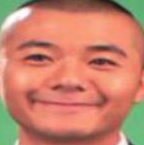

In [31]:
from google.colab.patches import cv2_imshow
test_image=cv2.imread('/content/sample_data/test.jpg')
cv2_imshow(test_image)

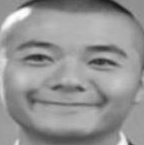

In [33]:
gray_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [43]:
face_cascade=cv2.CascadeClassifier('/content/sample_data/haarcascade_frontalface_default.xml')

neutral


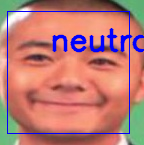

In [47]:
faces=face_cascade.detectMultiScale(gray_image,1.1,4)
for (x,y,w,h) in faces :
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),)
    roi_gray=gray_image[y:y+w,x:x+h]
    roi_gray=cv2.resize(roi_gray,(48,48))
    image_pixels=img_to_array(roi_gray)
    image_pixels=np.expand_dims(image_pixels,axis=0)
    image_pixels/=255
    predictions=model.predict(image_pixels)
    max_index=np.argmax(predictions[0])
    emotion_detection=('angry','disgust','fear','happy','sad','surprise','neutral')
    emotion_prediction=emotion_detection[max_index]
    print(emotion_prediction)
    font=cv2.FONT_HERSHEY_SIMPLEX
    org=(50,50)
    fontScale=1
    color=(255,0,0)
    thickness=2
    image=cv2.putText(test_image,emotion_prediction,org,font,fontScale,color,thickness,cv2.LINE_AA)
    cv2_imshow(image)
    